# **Algorithm and Data Mining for Data Science Homework 2**



## **#2 Homework: Instagram Profiles & Posts**

## **[RQ1] Data Analysis (EDA)**

In [1]:
# import libraries
import pandas as pd

In [2]:
posts = pd.read_csv('../Datasets/instagram_posts.csv', sep="\t", iterator=True, chunksize = 1000)
locations = pd.read_csv('../Datasets/instagram_locations.csv', sep='\t', iterator=True, chunksize = 100)
profiles = pd.read_csv('../Datasets/instagram_profiles.csv', sep='\t', iterator=True, chunksize = 100)
num_chunks = 10000

In [3]:
posts_chunk = posts.get_chunk(num_chunks)
locations_chunk = locations.get_chunk(num_chunks)
profiles_chunk = profiles.get_chunk(num_chunks)

In [4]:
posts.get_chunk(5)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
10000,28381208,-1,BpPPJe6FnO3,8135621357,173399483337248,2018-10-22 16:04:23.000,1,"Velkommen til Verksted Jord, vi har åpent tors...",37,0
10001,28381168,-1,BtoKk2Jlszk,3117914696,316620195072788,2019-02-08 17:31:01.000,1,"I get to paint this beautiful hair tomorrow, I...",59,1
10002,28381166,-1,Bt-Fml-g4Vj,3117914696,316620195072788,2019-02-17 05:50:51.000,1,🎨✨Another one for @oneshothairawards #btconesh...,30,0
10003,28381167,-1,BtsDooElK-x,3117914696,316620195072788,2019-02-10 05:47:20.000,1,Just a little taste of something new coming fr...,80,2
10004,28381165,-1,Bt_15oDgPNL,3117914696,316620195072788,2019-02-17 22:12:07.000,1,Cool Balayage 🌪 @oneshothairawards #btconeshot...,43,1


In [5]:
posts_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sid              10000 non-null  int64 
 1   sid_profile      10000 non-null  int64 
 2   post_id          10000 non-null  object
 3   profile_id       10000 non-null  int64 
 4   location_id      10000 non-null  int64 
 5   cts              10000 non-null  object
 6   post_type        10000 non-null  int64 
 7   description      9228 non-null   object
 8   numbr_likes      10000 non-null  int64 
 9   number_comments  10000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 781.4+ KB


In [6]:
locations.get_chunk(5)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
10000,729105,254897701743394,Tita Cecilia,621 W Carson St,90745,"Carson, California",NaN,US,(424) 731-7218,False,...,West Carson,west-carson,US,United States,-118.286770,33.831880,NaN,tita-cecilia,http://www.farmersagent.com/,2019-05-29 10:30:41.784
10001,729107,113829812660344,Balneario Buenos Aires Maldonado,NaN,NaN,"Barra De Maldonado, Maldonado, Uruguay",NaN,UY,NaN,False,...,Barra de Maldonado,barra-de-maldonado,UY,Uruguay,-54.800241,-34.885643,NaN,balneario-buenos-aires-maldonado,NaN,2019-05-29 10:30:48.639
10002,729109,39247447,Hotel Imperial,Maršala Tita 124/3,51410,Abbazia,NaN,HR,+385(51)710444,False,...,NaN,NaN,NaN,NaN,14.305749,45.334341,NaN,hotel-imperial,http://www.remisens.com/en/hotel-imperial,2019-05-29 10:30:55.160
10003,729082,2309122105768753,Cafe u Najády,Dr. Veselého 178,763 26,Luhacovice,NaN,CZ,+420608908777,False,...,Luhacovice,luhacovice,CZ,Czech Republic,17.759249,49.105132,NaN,cafe-u-najady,NaN,2019-05-29 10:29:20.423
10004,729088,884397744992253,Karya Binayak Temple,Suryabinayak,NaN,"Bungmati, Nepal",NaN,NP,9841176079,False,...,NaN,NaN,NaN,NaN,85.302375,27.631869,NaN,karya-binayak-temple,NaN,2019-05-29 10:29:41.831


In [7]:
locations_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sid                     10000 non-null  int64  
 1   id                      10000 non-null  int64  
 2   name                    10000 non-null  object 
 3   street                  6859 non-null   object 
 4   zip                     6690 non-null   object 
 5   city                    9057 non-null   object 
 6   region                  5 non-null      object 
 7   cd                      9062 non-null   object 
 8   phone                   5664 non-null   object 
 9   aj_exact_city_match     9749 non-null   object 
 10  aj_exact_country_match  9749 non-null   object 
 11  blurb                   3793 non-null   object 
 12  dir_city_id             4767 non-null   object 
 13  dir_city_name           4767 non-null   object 
 14  dir_city_slug           4759 non-null  

In [8]:
profiles.get_chunk(5)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
10000,4195504,416365428,shytown1972,esteban toledo,NaN,NaN,NaN,NaN,NaN,2019-08-02 03:09:32.567 -0400,NaN
10001,4195507,11586554930,nc_thoughts,NC Thoughts,Art 🖼 Poetry 💋 Photography 📸 \nInvisible illne...,296.0,59.0,35.0,www.redbubble.com/people/ncthoughts?ref=more_w...,2019-08-02 03:09:39.203 -0400,True
10002,4195508,3190180070,soflobeachblog,SoFlo Girl,Im just a New England girl who fell in love w/...,4241.0,2411.0,670.0,NaN,2019-08-02 03:09:56.635 -0400,False
10003,4195513,372838856,mikeroma79,Mike | Real Estate | Fitness,Arte Surfside/Corcoran Sunshine/Lic Sales Asso...,662.0,11766.0,285.0,fnx.grsm.io/mikeroma79,2019-08-02 03:10:17.542 -0400,False
10004,4195515,17486517,beardgang,BEARDGANG,NaN,NaN,NaN,NaN,NaN,2019-08-02 03:10:32.345 -0400,NaN


In [9]:
profiles_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sid                  10000 non-null  int64  
 1   profile_id           10000 non-null  int64  
 2   profile_name         10000 non-null  object 
 3   firstname_lastname   9571 non-null   object 
 4   description          5096 non-null   object 
 5   following            6379 non-null   float64
 6   followers            6379 non-null   float64
 7   n_posts              6379 non-null   float64
 8   url                  2325 non-null   object 
 9   cts                  9999 non-null   object 
 10  is_business_account  6379 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB


In [10]:

num_post_ids, num_loc_cities, num_profiles_names = posts_chunk['post_id'].nunique(), locations_chunk['city'].nunique(), profiles_chunk['profile_name'].nunique()

print("Unique post IDs: {}".format(num_post_ids))
print("Unique location cities: {}".format(num_loc_cities))
print("Unique profile names: {}".format(num_profiles_names))

Unique post IDs: 10000
Unique location cities: 4856
Unique profile names: 10000


## **[RQ2] Simple Insights**

In [36]:
# Plot the number of posts for each profile in descending order
profiles_chunk.groupby(["profile_id"], dropna=True)['n_posts'].sum()
profiles_chunk.sort_values(by='n_posts', ascending = False)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
6957,4192500,243048679,fawaz4422,Fawaz Abdullah Al Jaidah,🇬🇧. @Fawazabdullah.🇬🇧 @hani_almawash - @w3c5 -...,6755.0,9976.0,37753.0,NaN,2019-08-01 23:13:49.919 -0400,True
3256,4188835,978311336,djpeanutwao,Raul Alberto Marin Ayarza,"Locutor en Wao971/2, Dj y animador profesional...",3022.0,20033.0,14271.0,www.sal-mar.com,2019-08-01 18:41:00.467 -0400,False
1424,4185860,7488360111,maciej.rekosiewicz,Maciej Rękosiewicz,"Udaję że piszę, udaję że fotografuję, udaję że...",1342.0,18526.0,13831.0,NaN,2019-08-01 16:21:07.098 -0400,False
6245,4191788,1345225405,sriutari_,Utarishopbali,"Fasion Wantia&Pria, Pakian Adat Bali, BataM, D...",7504.0,2626.0,12677.0,m.facebook.com/sriutari.cute?fref=nf,2019-08-01 22:18:22.884 -0400,False
6416,4191982,1707976050,elf_qadin_dunyasi,ELF ❤ Qadin Dunyasi,📲☎️whatsApp 050 884 0999🇦🇿🇦🇿🇦🇿 Dunyaca meshur ...,787.0,23123.0,11899.0,NaN,2019-08-01 22:34:50.509 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...
9982,4195473,8371589679,shotoniphoneseries,Shot On iPhone Series,NaN,NaN,NaN,NaN,NaN,2019-08-02 03:06:49.301 -0400,NaN
9985,4195482,271762435,ilsanders89,Imogen Litan Sanders,NaN,NaN,NaN,NaN,NaN,2019-08-02 03:07:29.675 -0400,NaN
9987,4195486,1965945621,grantabooks,Granta Books,NaN,NaN,NaN,NaN,NaN,2019-08-02 03:07:49.425 -0400,NaN
9995,4195511,2875637492,mrslucyevans,Lucy Evans,NaN,NaN,NaN,NaN,NaN,2019-08-02 03:10:11.714 -0400,NaN


In [12]:
# What posts have the highest number of "likes"?
posts_chunk.sort_values(by='numbr_likes', ascending=False).head(10)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
1861,28372824,3444658,BWatkdZACtC,7061024,59743640,2017-07-11 21:05:22.000,1,Я вот просматриваю иногда свой аккаунт Инстагр...,298913,386
1265,26702072,301272,BP3clgjDC-Q,319897212,1029929202,2017-01-30 00:15:11.000,1,Iridescent pastel pink 🦄 \nCreated using Lipgl...,129571,386
2660,28374117,548786,Bvo_FBVgypy,208502444,751708427,2019-03-30 18:12:35.000,1,Confirmation that Huddersfield are relegated f...,123678,484
5471,28376593,-1,BJs2p4ZBYn3,335410451,568572977,2016-08-29 19:22:57.000,1,On rigole bien quand même💃🏼,106113,545
5805,28376800,-1,BaWZhdrnL2n,530835252,274141210,2017-10-17 14:58:48.000,1,Algún día debería hacer una quedada 🤤🤤\nCuando...,67342,398
4786,28375819,-1,BxDZBh-nMLT,3127385206,347539836,2019-05-04 21:50:56.000,1,"Prévias feitas! Agora é comer, descansar e esp...",60736,879
4489,28375502,96176,BWV0XlLFYap,28226901,56495,2017-07-09 23:28:34.000,1,Baby Driver in Wellington (📸 @carmelovarela),50442,116
7633,28378626,355000,BeoMTEvAPHr,43867292,229414338,2018-01-31 21:55:09.000,1,Great morning at Spence. Many thanks Hollie @h...,47271,152
7115,28378115,-1,BvQHvOHBOab,1526791424,1018609727,2019-03-21 02:27:14.000,1,Măm Măm 😋😋😋 #ngoctrinh #ngoctrinhofficial #you...,47065,171
1407,28372402,3267216,BMZ1dkwAFSH,26017486,5096215,2016-11-04 22:41:09.000,1,date night at putte's 🍕#helsinkisecret,43821,53


In [13]:
# What posts have the most and the least number of comments?
most_comments = posts_chunk.sort_values(by='number_comments', ascending=False).head(10)
least_comments = posts_chunk.sort_values(by=['number_comments', 'numbr_likes'], ascending=[True, True]).head(10)
pd.concat([most_comments,least_comments], axis = 0)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
5633,27386281,3398819,BgkKMt4hAW7,2955286544,1012854533,2018-03-21 01:22:38.000,1,"Доброе утро, красотки 💃🏻\nУ нас отличная новос...",302,13983
3319,28374324,396283,BfrIDlygv1G,217723373,548438207,2018-02-26 21:47:12.000,1,"Despite a steady downpour, thousands flocked t...",23425,1340
9733,28380873,-1,BxCwkRuAKgi,238711109,2229985840579401,2019-05-04 15:57:25.000,1,🎉🎉GIVEAWAY🎉🎉\n.\n@yifangtea.sg has launched th...,641,1012
4786,28375819,-1,BxDZBh-nMLT,3127385206,347539836,2019-05-04 21:50:56.000,1,"Prévias feitas! Agora é comer, descansar e esp...",60736,879
2659,25528599,-1,BtB0CP-nAIc,373344088,751708427,2019-01-24 20:02:55.000,1,I'm really happy for the opportunity to play i...,24232,792
4417,28375403,87675,BxuReBznXnw,7629888318,127562401356728,2019-05-21 13:32:16.000,1,🍦🍨🍦Ice cream giveaway!!🍦🍨🍦\nTo kick off summer...,432,642
5471,28376593,-1,BJs2p4ZBYn3,335410451,568572977,2016-08-29 19:22:57.000,1,On rigole bien quand même💃🏼,106113,545
2660,28374117,548786,Bvo_FBVgypy,208502444,751708427,2019-03-30 18:12:35.000,1,Confirmation that Huddersfield are relegated f...,123678,484
567,28371656,-1,BfymkS7nVN8,20935109,264423834,2018-03-01 19:28:30.000,1,"NAME MY SHOW!!!Awhile back, I asked you guys w...",20848,467
5805,28376800,-1,BaWZhdrnL2n,530835252,274141210,2017-10-17 14:58:48.000,1,Algún día debería hacer una quedada 🤤🤤\nCuando...,67342,398


In [14]:
# How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.
no_location = posts_chunk['location_id'].isna().sum()
tagged_location = posts_chunk['location_id'].count()

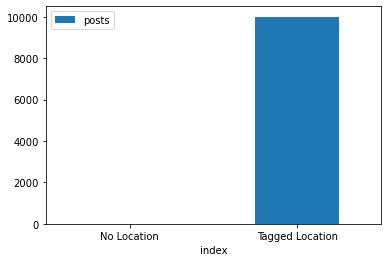

In [15]:
df = pd.DataFrame({'posts': [no_location, tagged_location],
                  'index': ['No Location', 'Tagged Location']})

plot = df.plot.bar(x='index', y='posts', rot=0)

In [21]:
# How many posts include only photos? How many also have videos?
only_photos = posts_chunk.loc[posts_chunk['post_type'] == 1, 'post_type'].sum()
video_multi = posts_chunk.loc[posts_chunk['post_type'] > 1, 'post_type'].sum()

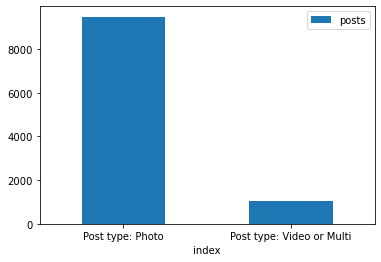

In [22]:
df = pd.DataFrame({'posts': [only_photos, video_multi],
                   'index': ['Post type: Photo', 'Post type: Video or Multi']})

plot = df.plot.bar(x='index', y='posts', rot=0)

In [55]:
# What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

business, not_business = profiles_chunk['is_business_account'].value_counts()
not_business += profiles_chunk['is_business_account'].isnull().sum()
print("business account percentage: {}\nnot business account percentage: {}".format((business/profiles_chunk['is_business_account'].size) * 100 , (not_business/profiles_chunk['is_business_account'].size) * 100))

business account percentage: 37.15
not business account percentage: 62.849999999999994


## **[RQ3] Now it's important to understand the most common times in which users publish their posts**